In [1]:
from os.path import join

import csiborgtools
import matplotlib.pyplot as plt
import numpy
import scienceplots  # noqa
from cache_to_disk import cache_to_disk, delete_disk_caches_for_function  # noqa

import plt_utils

%load_ext autoreload
%autoreload 2

# Field evaluated at radial shells

In [2]:
# TODO: This is a little dodgy

def plot_field_shells(field, MAS, grid, to_save=True):
    folder = "/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells"

    # with plt.style.context("notebook"):
    if True:
        cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
        lw = plt.rcParams['lines.linewidth']
        plt.figure()

        # CSiBORG2 main
        fname = join(folder, f"csiborg2_main_{field}_{MAS}_{grid}.npz")
        file = numpy.load(fname)
        dist, mean = file["distances"], file["mean"]
        mean /= dist
        mean /= 70
        for i in range(len(mean)):
            plt.plot(dist, mean[i], c=cols[0], label="CSiBORG" if i == 0 else None)
        
        # # BORG2
        # fname = join(folder, f"borg2_{field}_{MAS}_{grid}.npz")
        # file = numpy.load(fname)
        # dist, mean = file["distances"], file["mean"]
        # for i in range(len(mean)):
        #     plt.plot(dist, mean[i], c=cols[2], label="BORG" if i == 0 else None)

        # # CSiBORG2 random
        # fname = join(folder, f"csiborg2_random_{field}_{MAS}_{grid}.npz")
        # file = numpy.load(fname)
        # dist, mean = file["distances"], file["mean"]

        # mu = numpy.mean(mean, axis=0)
        # std = numpy.std(mean, axis=0)

        # plt.fill_between(dist, mu - std, mu + std, alpha=1/3, color=cols[1])

        # for i in range(len(mean)):
            # plt.plot(dist, mean[i], c=cols[1], label="Random" if i == 0 else None, zorder=0, lw=lw/2)

        # Plot settings
        plt.legend(loc="lower right")
        plt.xlabel(r"$r ~ [\mathrm{Mpc} / h]$")

        if field == "radvel":
            plt.ylabel(r"$\langle v_r \rangle ~ [\mathrm{km} / s]$")
            plt.axhline(0, c="k", ls="--",)
            plt.ylim(-0.1, 0.1)
            plt.xscale("log")
        elif field == "overdensity":
            plt.ylim(-0.5, 0.5)
            plt.axhline(0, c="k", ls="--",)
            # plt.xlim(0, 200)
            plt.ylabel(r"$\langle \delta_r \rangle$")
            # plt.axhline(-0.1, c="k", ls="--")
        elif field == "density":
            plt.axhline(277.5 * 0.304, c="k", ls="--",)
            plt.ylim(50, 100)

        plt.xlim(0, dist.max())
        # plt.xlim(0, 100)

        if to_save:
            fout = join(plt_utils.fout, f"field_shells_{field}_{MAS}_{grid}.png")
            print(f"Saving to `{fout}`.")
            plt.savefig(fout, dpi=plt_utils.dpi, bbox_inches="tight")

        plt.show()

/tmp/ipykernel_16251/4241837727.py:58: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, dist.max())


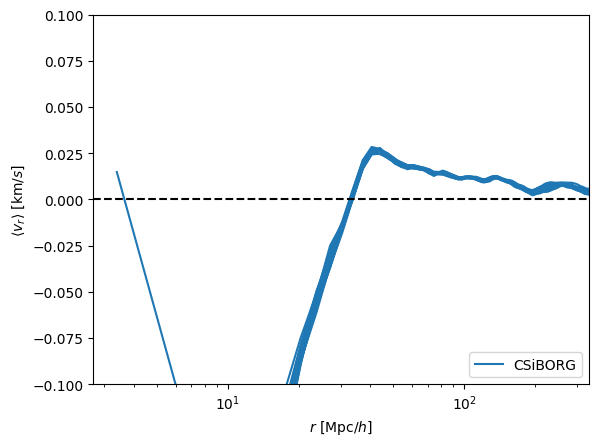

In [199]:
plot_field_shells("radvel", "SPH", 1024, False)

## Enclosed mass 

In [2]:
a

NameError: name 'a' is not defined

In [21]:
def plot_enclosed_overdensity(to_save=True):
    with plt.style.context("science"):
    # if True:
        cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
        fig, axs = plt.subplots(2, 1, sharex=True, figsize=(2 * 3.5, 2 * 1.5 * 2.625), gridspec_kw={"height_ratios": [1, 0.8]})
        fig.subplots_adjust(wspace=0, hspace=0)

        # CSiBORG2 main
        d = numpy.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/enclosed_mass_csiborg2_main.npz")
        V = 4 / 3 * numpy.pi * d["distances"]**3
        V35 = 4 / 3 * numpy.pi * 135**3
        rho_mean = 0.3111 * 277.53662724583074
        boxsize = csiborgtools.simname2boxsize("csiborg2_main")

        dist = d["distances"]
        density = d["enclosed_mass"] / V * 1e-9 / rho_mean - 1

        density135 = d["mass135"] / V35 * 1e-9 / rho_mean - 1
        densitytot = d["masstot"] / boxsize**3 * 1e-9 / rho_mean - 1

        print(f"CSiBORG2_main overdensity within 135 Mpc / h: {numpy.mean(density135)} +- {numpy.std(density135)}")
        print(f"CSiBORG2_main density of the entire box:      {numpy.mean(densitytot)} +- {numpy.std(densitytot)}")
        mu = numpy.mean(density, axis=0)
        y = numpy.copy(density)
        for i in range(len(density)):
            axs[0].plot(dist, density[i], c=cols[0], alpha=0.25, ls="dashed")
            y[i] /= mu
            y[i] -= 1
        axs[0].plot(dist, mu, c=cols[0], label="CB2_main")
        mu2, std2 = numpy.mean(y, axis=0), numpy.std(y, axis=0)
        axs[1].fill_between(dist, mu2 - std2, mu2 + std2, alpha=0.5, color=cols[0])

        # CSiBORG2 varysmall
        d = numpy.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/enclosed_mass_csiborg2_varysmall.npz")
        V = 4 / 3 * numpy.pi * d["distances"]**3
        V35 = 4 / 3 * numpy.pi * 135**3
        rho_mean = 0.3111 * 277.53662724583074
        boxsize = csiborgtools.simname2boxsize("csiborg2_varysmall")

        dist = d["distances"]
        density = d["enclosed_mass"] / V * 1e-9 / rho_mean - 1

        density135 = d["mass135"] / V35 * 1e-9 / rho_mean - 1
        densitytot = d["masstot"] / boxsize**3 * 1e-9 / rho_mean - 1

        print(f"CSiBORG2_varysmall overdensity within 135 Mpc / h: {numpy.mean(density135)} +- {numpy.std(density135)}")
        print(f"CSiBORG2_varysmall density of the entire box:      {numpy.mean(densitytot)} +- {numpy.std(densitytot)}")
        mu = numpy.mean(density, axis=0)
        y = numpy.copy(density)
        for i in range(len(density)):
            axs[0].plot(dist, density[i], c=cols[2], alpha=0.25, ls="dashed")
            y[i] /= mu
            y[i] -= 1
        axs[0].plot(dist, mu, c=cols[2], label="CB2_varysmall")
        mu2, std2 = numpy.mean(y, axis=0), numpy.std(y, axis=0)
        axs[1].fill_between(dist, mu2 - std2, mu2 + std2, alpha=0.5, color=cols[2])

        # CSiBORG2 random
        d = numpy.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/enclosed_mass_csiborg2_random.npz")
        V = 4 / 3 * numpy.pi * d["distances"]**3
        V35 = 4 / 3 * numpy.pi * 135**3
        rho_mean = 0.3111 * 277.53662724583074
        boxsize = csiborgtools.simname2boxsize("csiborg2_random")

        dist = d["distances"]
        density = d["enclosed_mass"] / V * 1e-9 / rho_mean - 1

        density135 = d["mass135"] / V35 * 1e-9 / rho_mean - 1
        densitytot = d["masstot"] / boxsize**3 * 1e-9 / rho_mean - 1

        print(f"CSiBORG2_random overdensity within 135 Mpc / h: {numpy.mean(density135)} +- {numpy.std(density135)}")
        print(f"CSiBORG2_random density of the entire box:      {numpy.mean(densitytot)} +- {numpy.std(densitytot)}")
        for i in range(len(density)):
            axs[0].plot(dist, density[i], c=cols[1], alpha=0.5, ls="dashed", zorder=0)
        mu = numpy.mean(density, axis=0)
        std = numpy.std(density, axis=0)
        axs[0].plot(dist, mu, c=cols[1], label="CB2_random", zorder=0)
        axs[0].fill_between(dist, mu - std, mu + std, alpha=1/3, color=cols[1], zorder=0)

        # CSiBORG1
        d = numpy.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/enclosed_mass_csiborg1.npz")
        V = 4 / 3 * numpy.pi * d["distances"]**3
        V35 = 4 / 3 * numpy.pi * 135**3
        rho_mean = 0.307 * 277.53662724583074
        boxsize = csiborgtools.simname2boxsize("csiborg1")

        dist = d["distances"]
        density = d["enclosed_mass"] / V * 1e-9 / rho_mean - 1

        density135 = d["mass135"] / V35 * 1e-9 / rho_mean - 1
        densitytot = d["masstot"] / boxsize**3 * 1e-9 / rho_mean - 1

        print(f"CSiBORG1 overdensity within 135 Mpc / h:    {numpy.mean(density135)} +- {numpy.std(density135)}")
        print(f"CSiBORG1 density of the entire box:         {numpy.mean(densitytot)} +- {numpy.std(densitytot)}")
        mu = numpy.mean(density, axis=0)
        y = numpy.copy(density)
        for i in range(len(density)):
            axs[0].plot(dist, density[i], c=cols[3], alpha=0.25, ls="dashed", zorder=0.5)
            y[i] /= mu
            y[i] -= 1
        axs[0].plot(dist, mu, c=cols[3], label="CB1", zorder=0.5)
        mu2, std2 = numpy.mean(y, axis=0), numpy.std(y, axis=0)
        axs[1].fill_between(dist, mu2 - std2, mu2 + std2, alpha=0.5, color=cols[3], zorder=0.5)

        
        # BORG2
        d = numpy.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/enclosed_mass_borg2.npz")
        V = d["enclosed_volume"]
        dist = d["distances"]
        rho_mean = 0.3111 * 277.53662724583074
        density = d["enclosed_mass"] / V / rho_mean - 1

        mu = numpy.mean(density, axis=0)
        y = numpy.copy(density)
        for i in range(len(density)):
            axs[0].plot(dist, density[i], c=cols[4], alpha=0.25, ls="dashed", zorder=0.5)
            y[i] /= mu
            y[i] -= 1
        axs[0].plot(dist, mu, c=cols[4], label="B2", zorder=0.5)
        mu2, std2 = numpy.mean(y, axis=0), numpy.std(y, axis=0)
        axs[1].fill_between(dist, mu2 - std2, mu2 + std2, alpha=0.5, color=cols[4], zorder=0.5)

        # BORG1
        d = numpy.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/enclosed_mass_borg1.npz")
        V = d["enclosed_volume"]
        dist = d["distances"]
        rho_mean = 0.307 * 277.53662724583074
        density = d["enclosed_mass"] / V / rho_mean - 1

        mu = numpy.mean(density, axis=0)
        y = numpy.copy(density)
        for i in range(len(density)):
            axs[0].plot(dist, density[i], c=cols[4], alpha=0.25, ls="dashed", zorder=0.5)
            y[i] /= mu
            y[i] -= 1
        axs[0].plot(dist, mu, c=cols[4], label="B2", zorder=0.5)
        mu2, std2 = numpy.mean(y, axis=0), numpy.std(y, axis=0)
        axs[1].fill_between(dist, mu2 - std2, mu2 + std2, alpha=0.5, color=cols[4], zorder=0.5)

        # Plot settings
        axs[0].set_ylim(-0.15, 0.15)
        axs[1].set_ylim(-0.4, 0.4)
        axs[1].set_xlim(-1, dist.max())
        axs[1].set_xlabel(r"$r ~ [\mathrm{Mpc} / h]$")
        axs[0].set_ylabel(r"$\delta_r$")
        axs[1].set_ylabel(r"$\delta_r / \langle \delta_r \rangle - 1$")

        axs[0].legend(fontsize="small")
        for i in range(2):
            axs[i].axvline(135, c="k", ls="--")
        fig.tight_layout(h_pad=0)

        if to_save:
            fout = join(plt_utils.fout, f"enclosed_overdensity.png")
            print(f"Saving to `{fout}`.")
            fig.savefig(fout, dpi=plt_utils.dpi, bbox_inches="tight")

        fig.show()

In [22]:
plot_enclosed_overdensity(True)

CSiBORG2_main overdensity within 135 Mpc / h: -0.04871875932547955 +- 0.00201984793460838
CSiBORG2_main density of the entire box:      -5.9114960471373655e-05 +- 2.4011781815055744e-07
CSiBORG2_varysmall overdensity within 135 Mpc / h: -0.050013774679444456 +- 7.933447782885623e-05
CSiBORG2_varysmall density of the entire box:      -5.8827166581804094e-05 +- 1.3328610811057487e-07
CSiBORG2_random overdensity within 135 Mpc / h: 0.006494700117062541 +- 0.03838291159994349
CSiBORG2_random density of the entire box:      -5.874905109742312e-05 +- 4.066696396103268e-07
CSiBORG1 overdensity within 135 Mpc / h:    -0.05300083843550532 +- 0.008948856840208618
CSiBORG1 density of the entire box:         0.0008964738425259703 +- 8.270101657242762e-07
Saving to `../plots/enclosed_overdensity.png`.


In [30]:
# CSiBORG1
d = numpy.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/enclosed_mass_csiborg1.npz")
V = 4 / 3 * numpy.pi * d["distances"]**3
V35 = 4 / 3 * numpy.pi * 135**3
rho_mean = 0.307 * 277.53662724583074
boxsize = csiborgtools.simname2boxsize("csiborg1")

dist = d["distances"]
density = d["enclosed_mass"] / V * 1e-9 / rho_mean - 1

density135 = d["mass135"] / V35 * 1e-9 / rho_mean - 1
densitytot = d["masstot"] / boxsize**3 * 1e-9 / rho_mean - 1


density135_csiborg1 = density135


# CSiBORG2 main
d = numpy.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/enclosed_mass_csiborg2_main.npz")
V = 4 / 3 * numpy.pi * d["distances"]**3
V35 = 4 / 3 * numpy.pi * 135**3
rho_mean = 0.3111 * 277.53662724583074
boxsize = csiborgtools.simname2boxsize("csiborg2_main")

dist = d["distances"]
density = d["enclosed_mass"] / V * 1e-9 / rho_mean - 1

density135 = d["mass135"] / V35 * 1e-9 / rho_mean - 1
densitytot = d["masstot"] / boxsize**3 * 1e-9 / rho_mean - 1

density135_csiborg2 = density135

In [39]:
numpy.std(density135_csiborg1), numpy.std(density135_csiborg2)

(0.008948856840208618, 0.00201984793460838)

In [41]:
paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)
paths.get_ics("csiborg2_main")

array([15517, 15617, 15717, 15817, 15917, 16017, 16117, 16217, 16317,
       16417, 16517, 16617, 16717, 16817, 16917, 17017, 17117, 17217,
       17317, 17417])

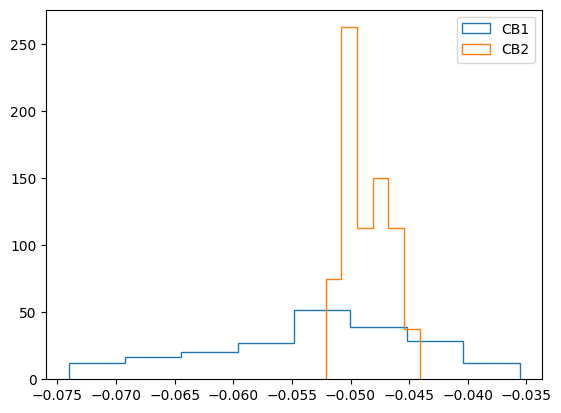

In [37]:
plt.figure()
plt.hist(density135_csiborg1, bins="auto", histtype="step", label="CB1", density=True)
plt.hist(density135_csiborg2, bins="auto", histtype="step", label="CB2", density=True)

plt.legend()

plt.show()

In [29]:
x = numpy.linspace(0, 1, 10)
numpy.vstack([x, x, x]).T

array([[0.        , 0.        , 0.        ],
       [0.11111111, 0.11111111, 0.11111111],
       [0.22222222, 0.22222222, 0.22222222],
       [0.33333333, 0.33333333, 0.33333333],
       [0.44444444, 0.44444444, 0.44444444],
       [0.55555556, 0.55555556, 0.55555556],
       [0.66666667, 0.66666667, 0.66666667],
       [0.77777778, 0.77777778, 0.77777778],
       [0.88888889, 0.88888889, 0.88888889],
       [1.        , 1.        , 1.        ]])

In [16]:
d = numpy.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/enclosed_mass_borg2.npz")
V = d["enclosed_volume"]
dist = d["distances"]
rho_mean = 0.3111 * 277.53662724583074
density = d["enclosed_mass"] / V / rho_mean - 1

## Bulk flow

In [118]:
def process_bulkflow_amplitude(cumulative_velocity, subtract_observer):
    if isinstance(subtract_observer, bool):
        if subtract_observer:
            subtract_observer = 0
        else:
            return numpy.linalg.norm(cumulative_velocity, axis=-1)

    if not isinstance(subtract_observer, int):
        raise TypeError("Incorrect type for `subtract_observer`.")

    for i in range(len(cumulative_velocity)):
        for j in range(3):
            cumulative_velocity[i, :, j] -= cumulative_velocity[i, subtract_observer, j]

    return numpy.linalg.norm(cumulative_velocity, axis=-1)


def plot_bulkflow_amplitude(subtract_observer=False, to_save=True):
    with plt.style.context("science"):
    # if True:
        plt.figure()

        # CSiBORG2 main
        d = numpy.load("/mnt/extraspace/rstiskalek/csiborg_postprocessing/field_shells/enclosed_mass_csiborg2_main.npz")
        dist = d["distances"]
        cumulative_velocity = d["cumulative_velocity"]
        cumulative_velocity_amplitude = process_bulkflow_amplitude(cumulative_velocity, subtract_observer)

        for i in range(len(cumulative_velocity_amplitude)):
            plt.plot(dist, cumulative_velocity_amplitude[i], c="C0", alpha=0.25, ls="dashed")
        plt.plot(dist, numpy.mean(cumulative_velocity_amplitude, axis=0), c="C0", label="CSiBORG2")


        plt.axvline(135, c="k", ls="--")
        plt.xlabel(r"$r ~ [\mathrm{Mpc} / h]$")
        plt.ylabel(r"$\langle U \rangle ~ [\mathrm{km} / \mathrm{s}]$")
        plt.legend()

        if to_save:
            fout = join(plt_utils.fout, f"enclosed_flow.png")
            print(f"Saving to `{fout}`.")
            plt.savefig(fout, dpi=plt_utils.dpi, bbox_inches="tight")

        plt.show()

Saving to `../plots/enclosed_flow.png`.


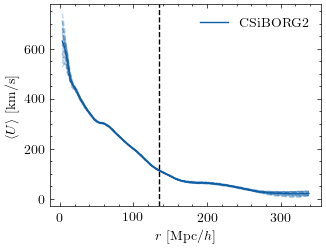

In [119]:
plot_bulkflow_amplitude(False, True)